In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.stats.stattools import durbin_watson

In [2]:
df1 = pd.read_csv('/content/drive/MyDrive/datasets/pr5_1.txt', names=['x'])
df2 = pd.read_csv('/content/drive/MyDrive/datasets/pr5_2.txt', names=['x'])


#Скользящее среднее

### df1

In [3]:
def sma(x:list, m:int): 
  x_pad = [x[0]] * m + x + [x[len(x) - 1]] * m
  res = []
  for i in range(m, len(x_pad) - m):
      xm = sum(x_pad[i - m : i + m + 1]) / (2 * m + 1)
      res.append(xm)
  return res

Подбор оптимальных параметров минимизирующих статистику Льюнинга Бокса

In [4]:
for i in range(3, 11, 2):
    x = list(df1['x'])
    sglaz = sma(x, i)
    x = np.array(x)
    sglaz = np.array(sglaz)
    print("m =", i, "     stat =",
          acorr_ljungbox(x - sglaz, lags = [5], return_df=True).iloc[0]['lb_stat'],
          '     pvalue =',
          acorr_ljungbox(x - sglaz, lags = [5], return_df=True).iloc[0]['lb_pvalue'])

m = 3      stat = 64.00339679294036      pvalue = 1.8036625294499937e-12
m = 5      stat = 119.1550172671889      pvalue = 4.739055644211788e-24
m = 7      stat = 120.17485785258715      pvalue = 2.8820145210594856e-24
m = 9      stat = 105.98466614285554      pvalue = 2.8882822672764456e-21


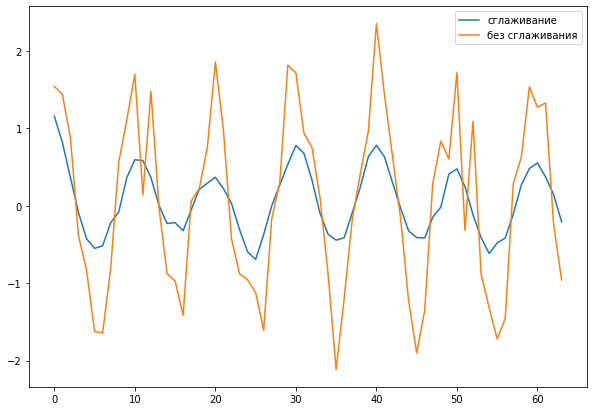

In [5]:
plt.figure(figsize = (10, 7))
x = list(df1['x'])
sglaz = sma(x, 3)
plt.plot(sglaz, label = 'сглаживание')
plt.plot(x, label = 'без сглаживания')
plt.legend(fontsize = 10)

Тест Дарбина Уотсон

d = 2 указывает на отсутствие автокорреляции
d < 2 указывает на положительную серийную корреляцию
d > 2 указывает на отрицательную серийную корреляцию

In [6]:
x = np.array(x)
sglaz = np.array(sglaz)
durbin_watson(x - sglaz)

1.0863779847307706

###df2

In [7]:
for i in range(3, 11, 2):
    x = list(df2['x'])
    sglaz = sma(x, i)
    x = np.array(x)
    sglaz = np.array(sglaz)
    print("m =", i, "     stat =",
          acorr_ljungbox(x - sglaz, lags = [5], return_df=True).iloc[0]['lb_stat'],
          '     pvalue =',
          acorr_ljungbox(x - sglaz, lags = [5], return_df=True).iloc[0]['lb_pvalue'])

m = 3      stat = 25.46509286415845      pvalue = 0.00011328170678403886
m = 5      stat = 10.03938607700542      pvalue = 0.07412692023040272
m = 7      stat = 7.1864747010227825      pvalue = 0.20713724887675816
m = 9      stat = 7.448192702104341      pvalue = 0.18938366662409106


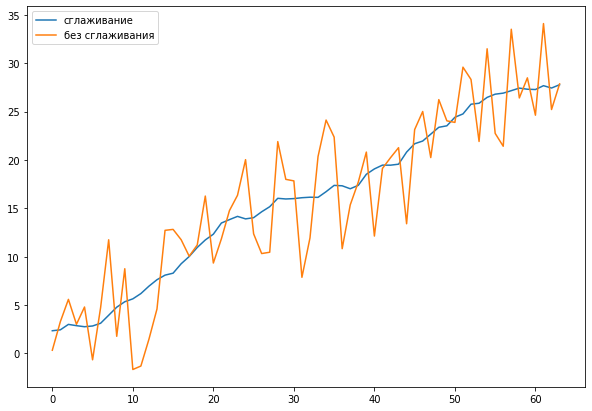

In [8]:
plt.figure(figsize = (10, 7))
x = list(df2['x'])
sglaz = sma(x, 7)
plt.plot(sglaz, label = 'сглаживание')
plt.plot(x, label = 'без сглаживания')
plt.legend(fontsize = 10)

Тест Дарбина Уотсон

d = 2 указывает на отсутствие автокорреляции
d < 2 указывает на положительную серийную корреляцию
d > 2 указывает на отрицательную серийную корреляцию

In [9]:
x = np.array(x)
sglaz = np.array(sglaz)
durbin_watson(x - sglaz)

2.0087675567081478

#Взвешенное скользящее среднее

###df1

In [10]:
np.array([1, 2, 3]) * np.array([4, 5, 6])

array([ 4, 10, 18])

In [11]:
def exp_w(m:int, a = 0.3):
    res = []
    k = 0
    for j in range(-m, m + 1):
        k += np.exp(-a * abs(j))
    for i in range(-m, m + 1):
        temp = np.exp(-a * abs(i)) / k
        res.append(temp)
    return res

In [12]:
def exp_wma(x:list, m:int): 
    x_pad = [x[0]] * m + x + [x[len(x) - 1]] * m
    res = []
    for i in range(m, len(x_pad) - m):
        xm = sum(np.array(x_pad[i - m : i + m + 1]) * exp_w(m))
        res.append(xm)
    return res

In [13]:
for i in range(3, 11, 2):
    x = list(df1['x'])
    sglaz = exp_wma(x, i)
    x = np.array(x)
    sglaz = np.array(sglaz)
    print("m =", i, "     stat =",
          acorr_ljungbox(x - sglaz, lags = [5], return_df=True).iloc[0]['lb_stat'],
          '     pvalue =',
          acorr_ljungbox(x - sglaz, lags = [5], return_df=True).iloc[0]['lb_pvalue'])

m = 3      stat = 45.11784219098251      pvalue = 1.3730027263795587e-08
m = 5      stat = 91.60882633206745      pvalue = 3.085062365266342e-18
m = 7      stat = 97.63501603453516      pvalue = 1.664668032687992e-19
m = 9      stat = 94.72693056201793      pvalue = 6.815809746587357e-19


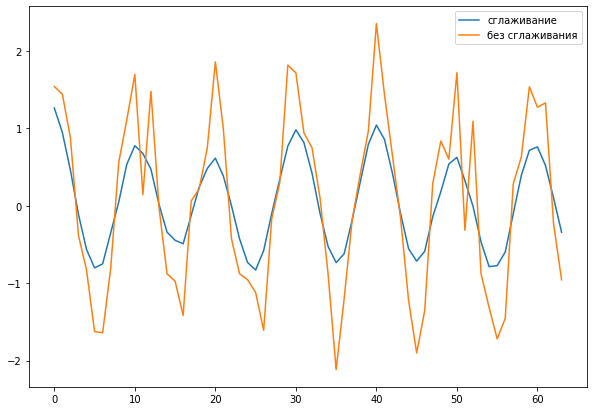

In [14]:
plt.figure(figsize = (10, 7))
x = list(df1['x'])
sglaz = exp_wma(x, 3)
plt.plot(sglaz, label = 'сглаживание')
plt.plot(x, label = 'без сглаживания')
plt.legend(fontsize = 10)

In [15]:
x = np.array(x)
sglaz = np.array(sglaz)
durbin_watson(x - sglaz)

1.3202019184376668

###df2

In [16]:
for i in range(3, 11, 2):
    x = list(df2['x'])
    sglaz = exp_wma(x, i)
    x = np.array(x)
    sglaz = np.array(sglaz)
    print("m =", i, "     stat =",
          acorr_ljungbox(x - sglaz, lags = [5], return_df=True).iloc[0]['lb_stat'],
          '     pvalue =',
          acorr_ljungbox(x - sglaz, lags = [5], return_df=True).iloc[0]['lb_pvalue'])

m = 3      stat = 18.81003550887889      pvalue = 0.0020851667094124817
m = 5      stat = 11.274327222509328      pvalue = 0.04620414742279002
m = 7      stat = 10.56654268642011      pvalue = 0.06068467827082096
m = 9      stat = 10.570936981957923      pvalue = 0.06058288004039095


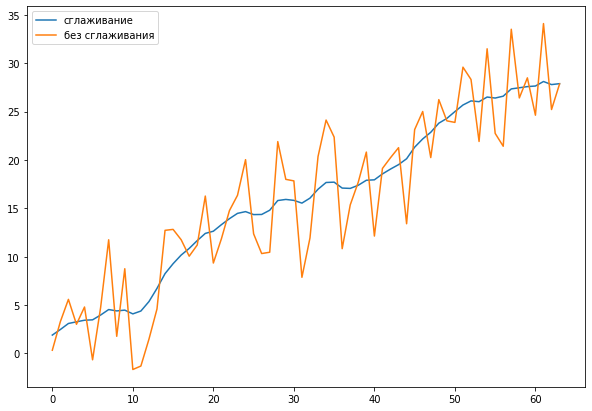

In [17]:
plt.figure(figsize = (10, 7))
x = list(df2['x'])
sglaz = exp_wma(x, 7)
plt.plot(sglaz, label = 'сглаживание')
plt.plot(x, label = 'без сглаживания')
plt.legend(fontsize = 10)

In [18]:
x = np.array(x)
sglaz = np.array(sglaz)
durbin_watson(x - sglaz)

2.208639317969253

# Экспоненциальное среднее

###df1

In [19]:
def ema(x, a):
    res = [x[0]]
    for i in range(1, len(x)):
        temp = res[i - 1] + a * (x[i] - res[i - 1])
        res.append(temp)
    return res

In [20]:
for i in np.arange(0.1, 1, 0.05):
    x = list(df1['x'])
    sglaz = ema(x, i)
    x = np.array(x)
    sglaz = np.array(sglaz)
    print("m =", round(i, 1), "     stat =",
          acorr_ljungbox(x - sglaz, lags = [5], return_df=True).iloc[0]['lb_stat'],
          '     pvalue =',
          acorr_ljungbox(x - sglaz, lags = [5], return_df=True).iloc[0]['lb_pvalue'])

m = 0.1      stat = 87.67534089372607      pvalue = 2.0675232724871272e-17
m = 0.2      stat = 91.75528522033903      pvalue = 2.8739487121227457e-18
m = 0.2      stat = 93.80193526703857      pvalue = 1.0668891203063928e-18
m = 0.3      stat = 94.14819167916227      pvalue = 9.021534499476621e-19
m = 0.3      stat = 93.11672694790462      pvalue = 1.4867410097658102e-18
m = 0.4      stat = 90.92069909298394      pvalue = 4.304111125549915e-18
m = 0.4      stat = 87.71353041884973      pvalue = 2.029714504584037e-17
m = 0.5      stat = 83.62504648806721      pvalue = 1.4617062243519814e-16
m = 0.5      stat = 78.78158349678658      pvalue = 1.508977904968869e-15
m = 0.6      stat = 73.31649501757741      pvalue = 2.088301503691832e-14
m = 0.6      stat = 67.37472421698372      pvalue = 3.601797813745056e-13
m = 0.7      stat = 61.11328680947513      pvalue = 7.154516003808851e-12
m = 0.7      stat = 54.69880146514481      pvalue = 1.505518672859837e-10
m = 0.8      stat = 48.3030078087

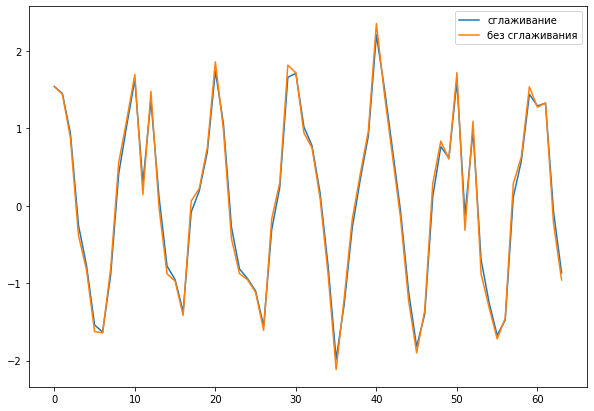

In [21]:
plt.figure(figsize = (10, 7))
x = list(df1['x'])
sglaz = ema(x, 0.9)
plt.plot(sglaz, label = 'сглаживание')
plt.plot(x, label = 'без сглаживания')
plt.legend(fontsize = 10)

In [22]:
x = np.array(x)
sglaz = np.array(sglaz)
durbin_watson(x - sglaz)

1.6315641230360554

###df2

In [23]:
for i in np.arange(0.1, 1, 0.1):
    x = list(df2['x'])
    sglaz = ema(x, i)
    x = np.array(x)
    sglaz = np.array(sglaz)
    print("m =", round(i, 1), "     stat =",
          acorr_ljungbox(x - sglaz, lags = [5], return_df=True).iloc[0]['lb_stat'],
          '     pvalue =',
          acorr_ljungbox(x - sglaz, lags = [5], return_df=True).iloc[0]['lb_pvalue'])

m = 0.1      stat = 4.944451193468724      pvalue = 0.4226970335732819
m = 0.2      stat = 6.86997809229343      pvalue = 0.23049119538159438
m = 0.3      stat = 8.366884248832616      pvalue = 0.1371415058850353
m = 0.4      stat = 9.396721427405696      pvalue = 0.09424873074767717
m = 0.5      stat = 9.981413411756888      pvalue = 0.07576360510873295
m = 0.6      stat = 10.262644004031493      pvalue = 0.06812633291586181
m = 0.7      stat = 10.469690473212058      pvalue = 0.06296945998449112
m = 0.8      stat = 10.89280734904746      pvalue = 0.05354721069736709
m = 0.9      stat = 11.849674102917334      pvalue = 0.036906672296264785


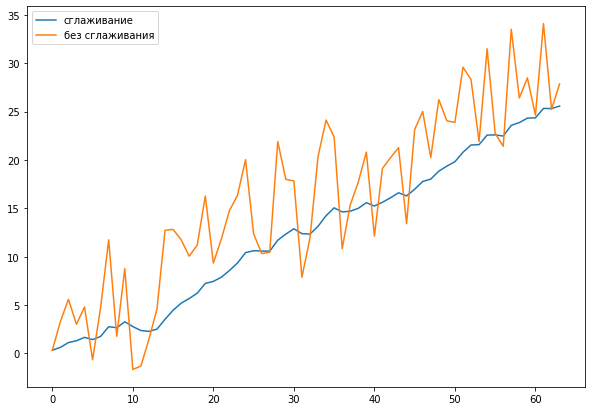

In [24]:
plt.figure(figsize = (10, 7))
x = list(df2['x'])
sglaz = ema(x, 0.1)
plt.plot(sglaz, label = 'сглаживание')
plt.plot(x, label = 'без сглаживания')
plt.legend(fontsize = 10)

# Двойное экспоненциальное среднее

###df1

In [25]:
def dema(x, a, g):
    y = [x[0]]
    b = [x[1] - x[0]]
    for i in range(1, len(x)):
        y_temp = a * x[i] + (1 - a) * (y[i - 1] + b[i - 1])
        y.append(y_temp)
        b_temp = g * (y[i] - y[i - 1]) + (1 - g) * b[i - 1]
        b.append(b_temp)
    return y

In [26]:
min_a = 0.1
min_g = 0.1
stat_min = 10000
for i in np.arange(0.1, 1, 0.1):
    for j in np.arange(0.1, 1, 0.1):
        x = list(df1['x'])
        sglaz = dema(x, i, j)
        x = np.array(x)
        sglaz = np.array(sglaz)
        print("a =", round(i, 1), "g =", round(j, 1), "     stat =",
              acorr_ljungbox(x - sglaz, lags = [5], return_df=True).iloc[0]['lb_stat'],
              '     pvalue =',
              acorr_ljungbox(x - sglaz, lags = [5], return_df=True).iloc[0]['lb_pvalue'])
        
        stat = acorr_ljungbox(x - sglaz, lags = [5], return_df=True).iloc[0]['lb_stat']
        if stat < stat_min:
            stat_min = stat
            min_a = i
            min_g = j

a = 0.1 g = 0.1      stat = 77.71529888169242      pvalue = 2.5209850727866003e-15
a = 0.1 g = 0.2      stat = 82.8907363669724      pvalue = 2.0830718985878908e-16
a = 0.1 g = 0.3      stat = 87.7013040380869      pvalue = 2.0417431903429146e-17
a = 0.1 g = 0.4      stat = 91.04120096066298      pvalue = 4.060325893740889e-18
a = 0.1 g = 0.5      stat = 92.72415704090531      pvalue = 1.7979895478990526e-18
a = 0.1 g = 0.6      stat = 93.74294731240133      pvalue = 1.0978100696063566e-18
a = 0.1 g = 0.7      stat = 95.22189770404518      pvalue = 5.3624226533953335e-19
a = 0.1 g = 0.8      stat = 97.51517129481445      pvalue = 1.764280770592852e-19
a = 0.1 g = 0.9      stat = 100.34375381183004      pvalue = 4.473045655271317e-20
a = 0.2 g = 0.1      stat = 94.54826288064532      pvalue = 7.432082043669669e-19
a = 0.2 g = 0.2      stat = 99.59324960589802      pvalue = 6.438421825541896e-20
a = 0.2 g = 0.3      stat = 103.76764985921191      pvalue = 8.482953667259039e-21
a = 0.2 g 

In [27]:
print('a =', round(min_a, 1), "   g =", min_g)

a = 0.8    g = 0.9


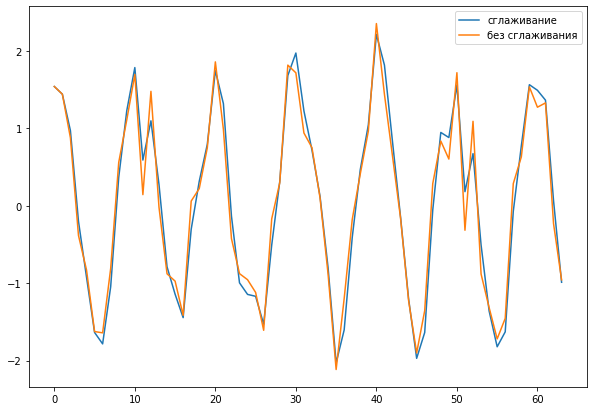

In [28]:
plt.figure(figsize = (10, 7))
x = list(df1['x'])
sglaz = dema(x, 0.8, 0.9)
plt.plot(sglaz, label = 'сглаживание')
plt.plot(x, label = 'без сглаживания')
plt.legend(fontsize = 10)

In [29]:
x = np.array(x)
sglaz = np.array(sglaz)
durbin_watson(x - sglaz)

2.2735695185013425

###df2

In [30]:
min_a = 0.1
min_g = 0.1
stat_min = 100000
for i in np.arange(0.1, 1, 0.1):
    for j in np.arange(0.1, 1, 0.1):
        x = list(df2['x'])
        sglaz = dema(x, i, j)
        x = np.array(x)
        sglaz = np.array(sglaz)
        print("a =", round(i, 1), "g =", round(j, 1), "     stat =",
              acorr_ljungbox(x - sglaz, lags = [5], return_df=True).iloc[0]['lb_stat'],
              '     pvalue =',
              acorr_ljungbox(x - sglaz, lags = [5], return_df=True).iloc[0]['lb_pvalue'])
        
        stat = acorr_ljungbox(x - sglaz, lags = [5], return_df=True).iloc[0]['lb_stat']
        if stat < stat_min:
            stat_min = stat
            min_a = i
            min_g = j

a = 0.1 g = 0.1      stat = 105.98632045719528      pvalue = 2.8859604980833885e-21
a = 0.1 g = 0.2      stat = 59.785621065362925      pvalue = 1.3459723418957374e-11
a = 0.1 g = 0.3      stat = 41.015654556161806      pvalue = 9.314707969479507e-08
a = 0.1 g = 0.4      stat = 36.70706755574307      pvalue = 6.856357560357271e-07
a = 0.1 g = 0.5      stat = 34.531502360773324      pvalue = 1.8658612062293667e-06
a = 0.1 g = 0.6      stat = 30.49490914281522      pvalue = 1.1783150601306091e-05
a = 0.1 g = 0.7      stat = 25.48799754021007      pvalue = 0.00011213153133796839
a = 0.1 g = 0.8      stat = 21.46988581727126      pvalue = 0.0006601009692218028
a = 0.1 g = 0.9      stat = 18.965634913958624      pvalue = 0.0019506722571667162
a = 0.2 g = 0.1      stat = 17.089328940240843      pvalue = 0.004333461236312662
a = 0.2 g = 0.2      stat = 8.838651471159375      pvalue = 0.1156754732388242
a = 0.2 g = 0.3      stat = 6.305198377181638      pvalue = 0.2776441432817277
a = 0.2 g = 

In [31]:
print('a =', round(min_a, 1), "   g =", min_g)

a = 0.3    g = 0.2


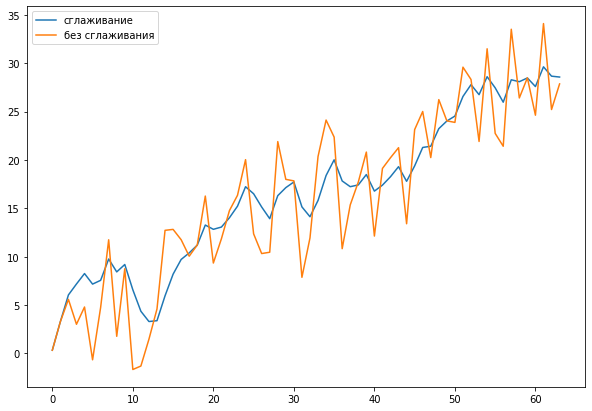

In [32]:
plt.figure(figsize = (10, 7))
x = list(df2['x'])
sglaz = dema(x, 0.3, 0.2)
plt.plot(sglaz, label = 'сглаживание')
plt.plot(x, label = 'без сглаживания')
plt.legend(fontsize = 10)

In [33]:
x = np.array(x)
sglaz = np.array(sglaz)
durbin_watson(x - sglaz)

1.7511958804016743